In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt # visualizing data
%matplotlib inline
import seaborn as sns

In [4]:
df = pd.read_csv(r'C:\Users\Digvijay Pundir\Downloads\DA_Project_Supermarket_sales\supermarket_sales - Sheet1.csv', encoding= 'unicode_escape')

In [5]:
df.shape

(1000, 15)

In [6]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Amount,Quantity,Tax 5%,Total,Date,Time,Payment,Cogs,Gross margin percentage
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,01-05-2019,13:08,Ewallet,NaN,NaN
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,03-08-2019,10:29,Cash,NaN,NaN
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,03-03-2019,13:23,Credit card,NaN,NaN
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,NaN,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,NaN,NaN
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,02-08-2019,10:37,Ewallet,NaN,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Invoice ID                1000 non-null   object 
 1   Branch                    1000 non-null   object 
 2   City                      1000 non-null   object 
 3   Customer type             1000 non-null   object 
 4   Gender                    1000 non-null   object 
 5   Product line              1000 non-null   object 
 6   Amount                    988 non-null    float64
 7   Quantity                  1000 non-null   int64  
 8   Tax 5%                    1000 non-null   float64
 9   Total                     1000 non-null   float64
 10  Date                      1000 non-null   object 
 11  Time                      1000 non-null   object 
 12  Payment                   1000 non-null   object 
 13  Cogs                      0 non-null      float64
 14   Gross ma

In [9]:
#drop unrelated/blank columns
df.drop(['Cogs', ' Gross margin percentage'], axis=1, inplace=True)

In [10]:
#check for null values
pd.isnull(df).sum()

Invoice ID        0
Branch            0
City              0
Customer type     0
Gender            0
Product line      0
Amount           12
Quantity          0
Tax 5%            0
Total             0
Date              0
Time              0
Payment           0
dtype: int64

In [11]:
# drop null values
df.dropna(inplace=True)

In [12]:
pd.isnull(df).sum()

Invoice ID       0
Branch           0
City             0
Customer type    0
Gender           0
Product line     0
Amount           0
Quantity         0
Tax 5%           0
Total            0
Date             0
Time             0
Payment          0
dtype: int64

In [13]:
df.shape

(988, 13)

In [14]:
# change data type
df['Amount'] = df['Amount'].astype('int')

In [15]:
df['Amount'].dtypes

dtype('int32')

In [16]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Amount', 'Quantity', 'Tax 5%', 'Total', 'Date', 'Time',
       'Payment'],
      dtype='object')

In [17]:
#rename column
df.rename(columns= {'City':'Place'})

,Invoice ID,Branch,Place,Customer type,Gender,Product line,Amount,Quantity,Tax 5%,Total,Date,Time,Payment
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74,7,26.1415,548.9715,01-05-2019,13:08,Ewallet
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15,5,3.8200,80.2200,03-08-2019,10:29,Cash
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46,7,16.2155,340.5255,03-03-2019,13:23,Credit card
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86,7,30.2085,634.3785,02-08-2019,10:37,Ewallet
5,699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85,7,29.8865,627.6165,3/25/2019,18:30,Ewallet
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40,1,2.0175,42.3675,1/29/2019,13:46,Ewallet
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97,10,48.6900,1022.4900,03-02-2019,17:16,Ewallet
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31,1,1.5920,33.4320,02-09-2019,13:22,Cash
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65,1,3.2910,69.1110,2/22/2019,15:33,Cash


In [18]:
# describe() method returns description of the data in the DataFrame (i.e. count, mean, std, etc)
df.describe()

,Amount,Quantity,Tax 5%,Total
count,988.000000,988.000000,988.000000,988.000000
mean,55.109312,5.502024,15.349746,322.344676
std,26.415244,2.926488,11.713212,245.977457
min,10.000000,1.000000,0.508500,10.678500
25%,32.000000,3.000000,5.824750,122.319750
50%,55.000000,5.000000,12.076000,253.596000
75%,77.000000,8.000000,22.428500,470.998500
max,99.000000,10.000000,49.650000,1042.650000


In [26]:
# use describe() for specific columns
df[[ 'Amount']].describe()

,Amount
count,988.000000
mean,55.109312
std,26.415244
min,10.000000
25%,32.000000
50%,55.000000
75%,77.000000
max,99.000000


In [ ]:
Exploratory Data Analysis

In [28]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Amount', 'Quantity', 'Tax 5%', 'Total', 'Date', 'Time',
       'Payment'],
      dtype='object')

In [ ]:
GENDER

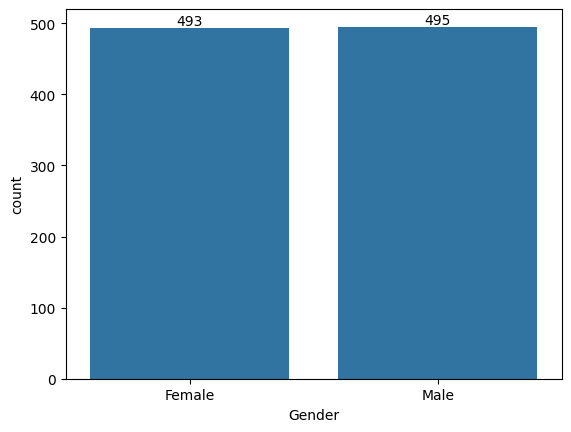

In [29]:
# plotting a bar chart for Gender and it's count

ax = sns.countplot(x = 'Gender',data = df)

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Gender', ylabel='Amount'>

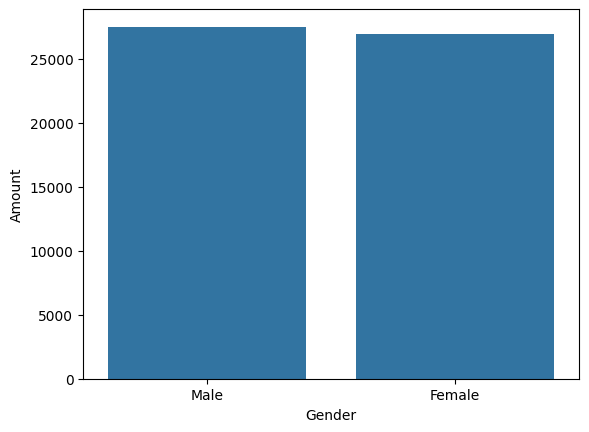

In [30]:
# plotting a bar chart for gender vs  amount

sales_gen = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.barplot(x = 'Gender',y= 'Amount' ,data = sales_gen)

In [ ]:
CITY

In [33]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Amount', 'Quantity', 'Tax 5%', 'Total', 'Date', 'Time',
       'Payment'],
      dtype='object')

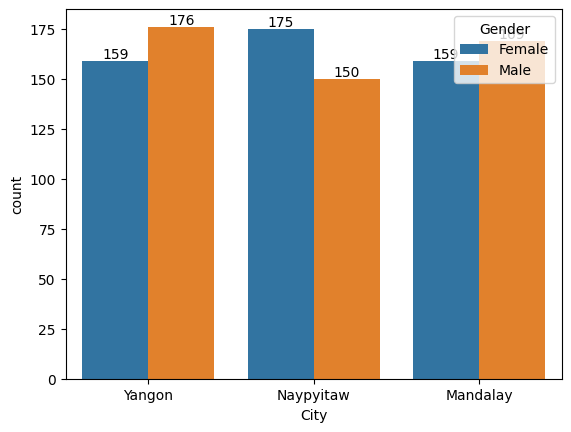

In [34]:
ax = sns.countplot(data = df, x = 'City', hue = 'Gender')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='City', ylabel='Amount'>

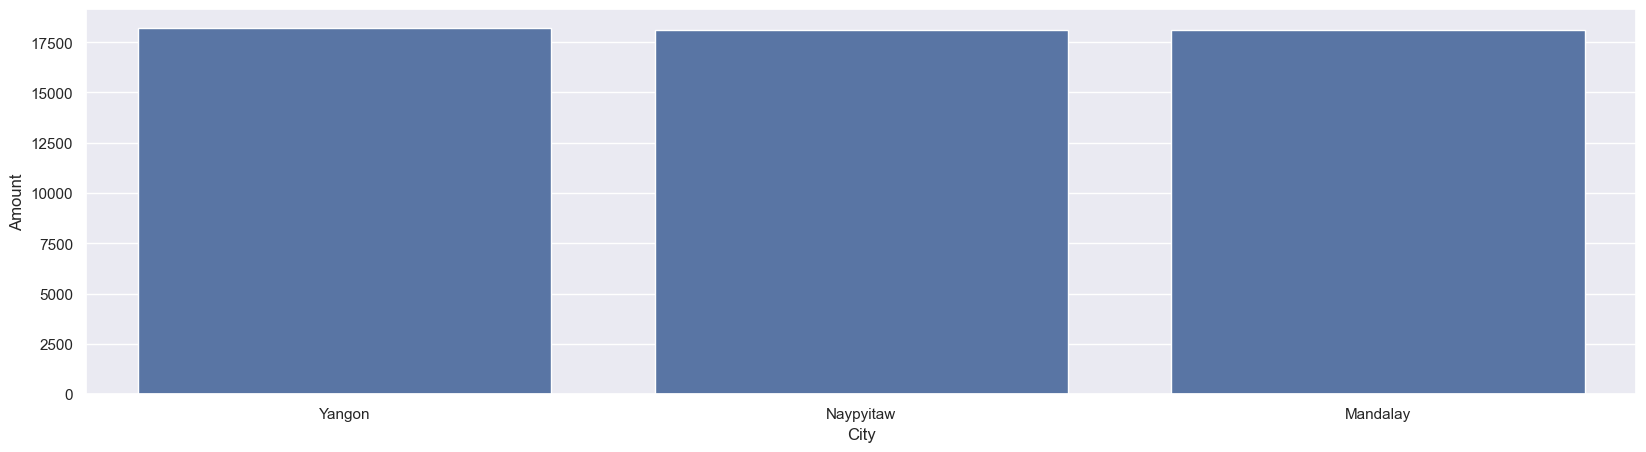

In [86]:
# City vs Amount
sales_age = df.groupby(['City'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.barplot(x = 'City',y= 'Amount' ,data = sales_age)

In [ ]:
PAYMENT

In [38]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Amount', 'Quantity', 'Tax 5%', 'Total', 'Date', 'Time',
       'Payment'],
      dtype='object')

<Axes: xlabel='Payment', ylabel='Amount'>

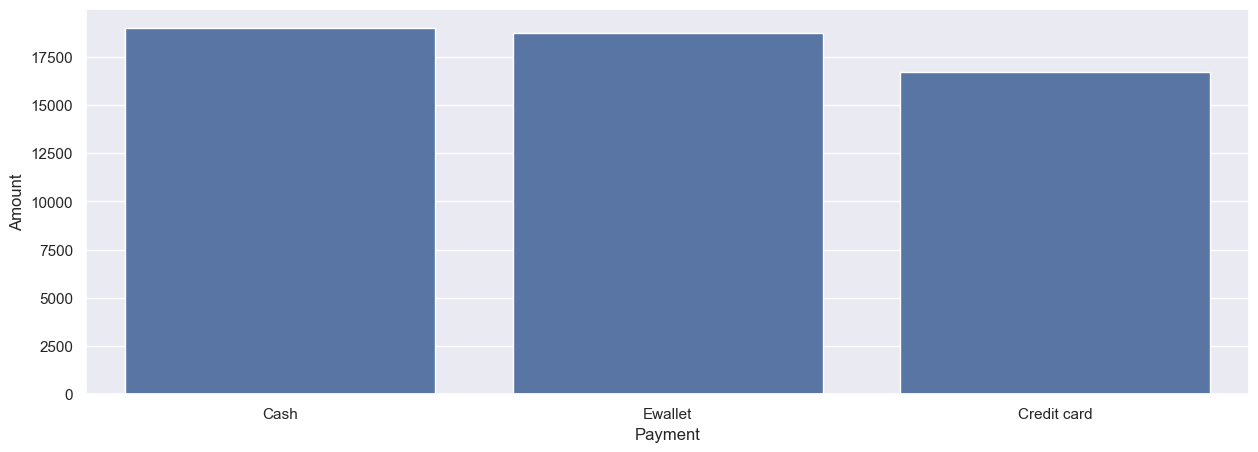

In [51]:
# total Amount vs Payment mode

sales_state = df.groupby(['Payment'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data = sales_state, x = 'Payment',y= 'Amount')

In [ ]:
BRANCH

In [55]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Amount', 'Quantity', 'Tax 5%', 'Total', 'Date', 'Time',
       'Payment'],
      dtype='object')

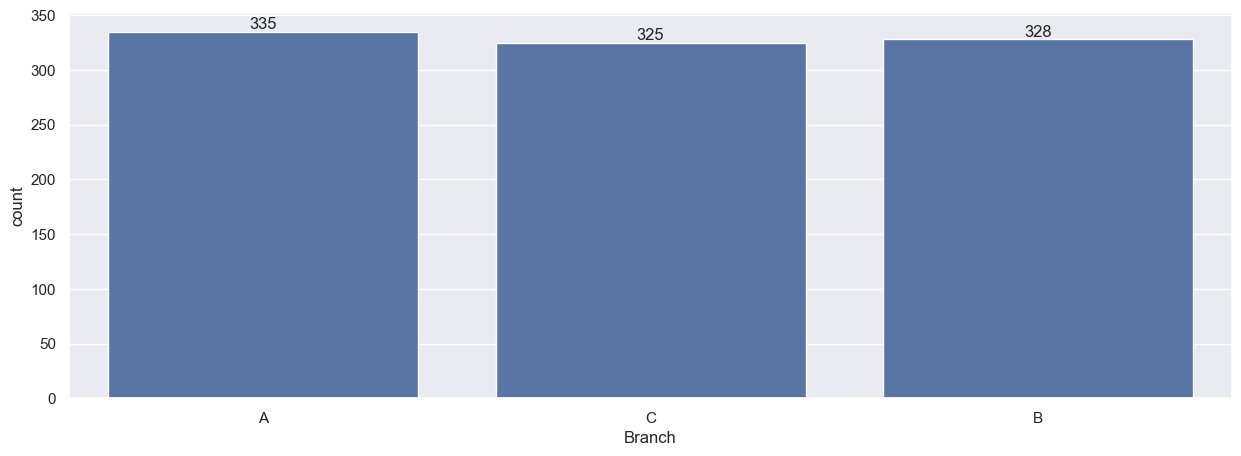

In [56]:
ax = sns.countplot(data = df, x = 'Branch')

sns.set(rc={'figure.figsize':(7,5)})
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Branch', ylabel='Amount'>

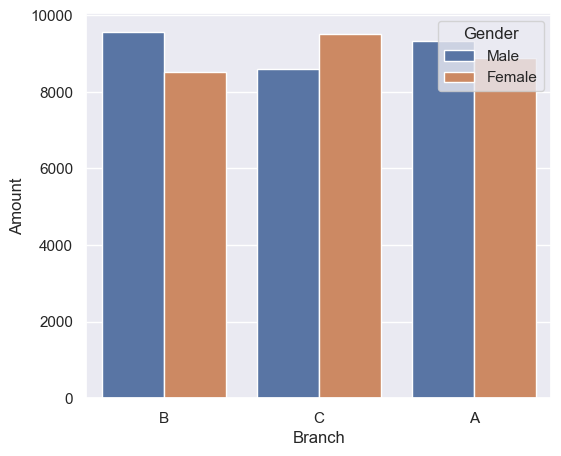

In [57]:
sales_state = df.groupby(['Branch', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(6,5)})
sns.barplot(data = sales_state, x = 'Branch',y= 'Amount', hue='Gender')

In [ ]:
CUSTOMER TYPE

In [58]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Amount', 'Quantity', 'Tax 5%', 'Total', 'Date', 'Time',
       'Payment'],
      dtype='object')

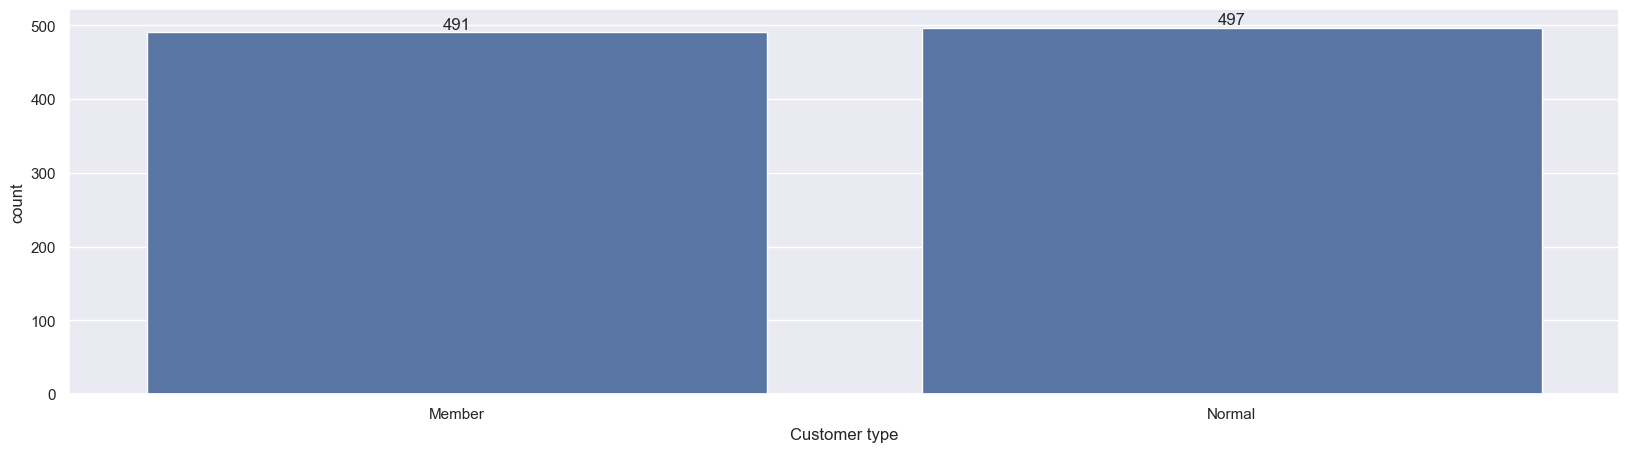

In [59]:
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data = df, x = 'Customer type')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Customer type', ylabel='Amount'>

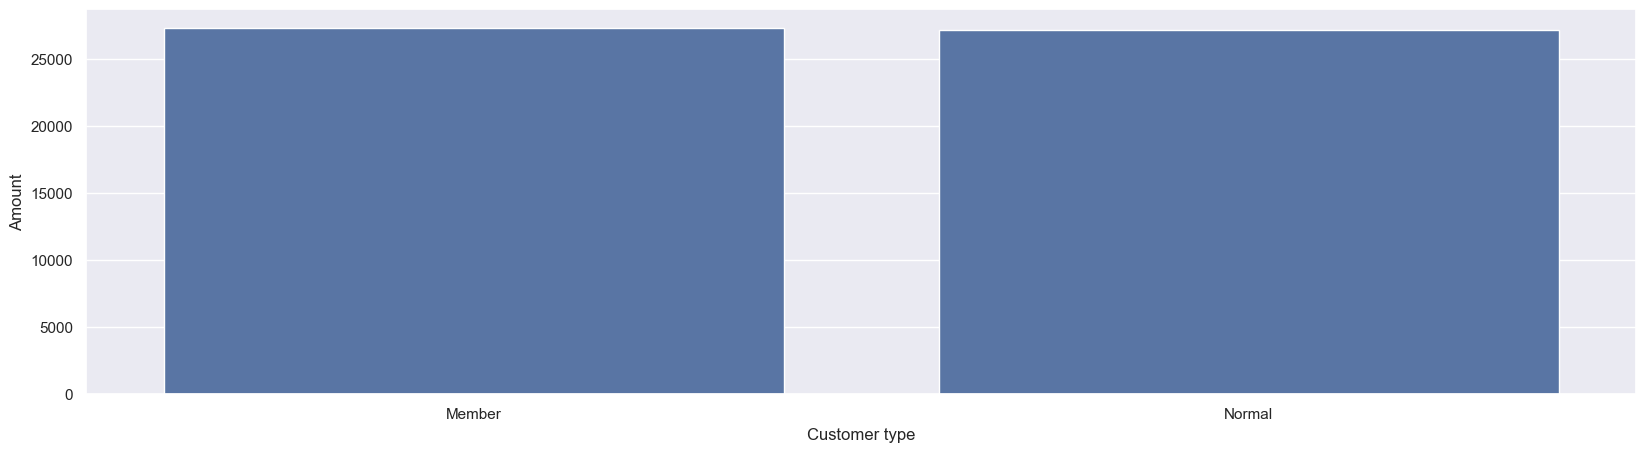

In [60]:
sales_state = df.groupby(['Customer type'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Customer type',y= 'Amount')

In [ ]:
PRODUCT LINE

In [61]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Amount', 'Quantity', 'Tax 5%', 'Total', 'Date', 'Time',
       'Payment'],
      dtype='object')

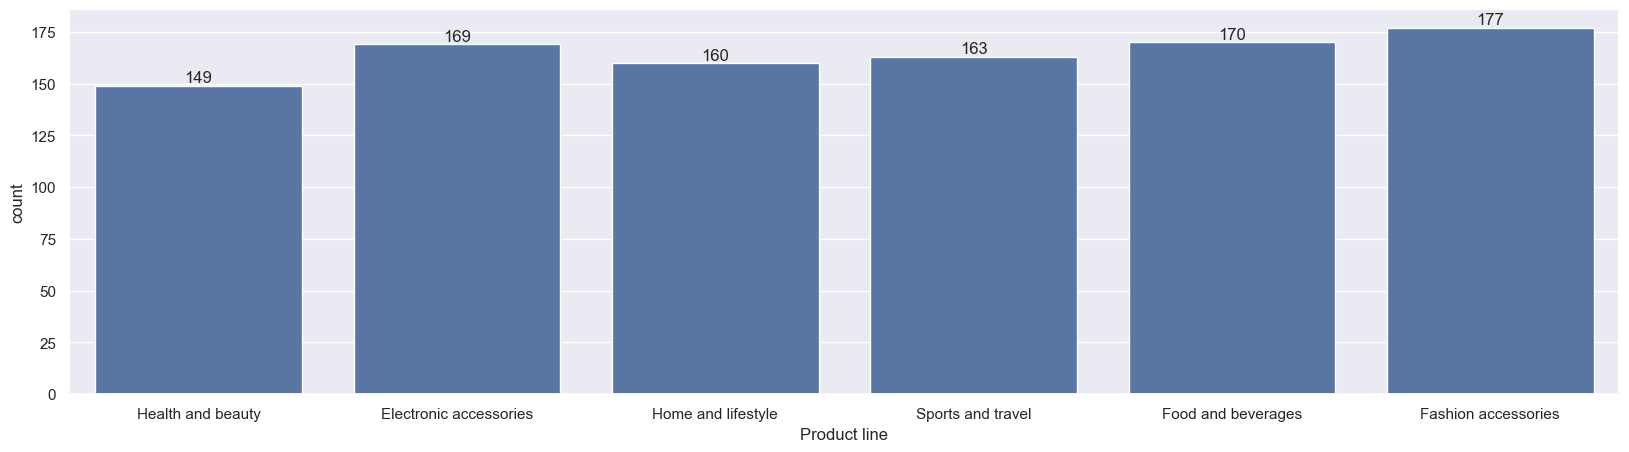

In [71]:
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data = df, x = 'Product line')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Product line', ylabel='Quantity'>

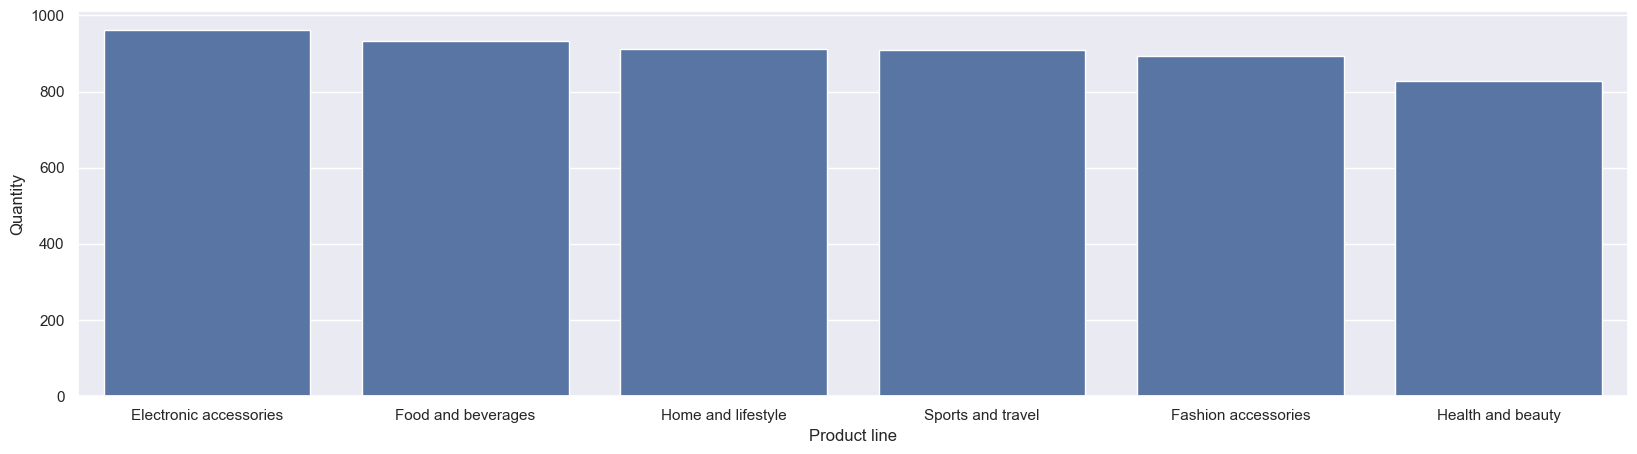

In [76]:
sales_state = df.groupby(['Product line'], as_index=False)['Quantity'].sum().sort_values(by='Quantity', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Product line',y= 'Quantity')

In [ ]:
CONCLUSION

In [ ]:
#In Yangon and Mandalay Branch Male customers is more than female except Naypyitaw have more female customers